In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import skimage as ski
from skimage import io

def narysuj(X,Y):
    plt.plot(X,Y)
    plt.yticks(range(max(Y)+1))
    plt.grid(True, linestyle='--')
    plt.xlim(0,max(X))
    plt.ylim(0,max(Y))
    plt.show()
    
    
def bresenhamLow(x0,y0,x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    yi = 1
    if dy < 0:
        yi = -1
        dy = -dy
    D = 2*dy - dx
    y = y0

    for x in range(x0,x1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            y = y + yi
            D = D - 2*dx
        D = D + 2*dy
    return pikselX,pikselY
    
def bresenhamHigh(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    dx = x1 - x0
    dy = y1 - y0
    xi = 1
    if dx < 0:
        xi = -1
        dx = -dx
    D = 2*dx - dy
    x = x0

    for y in range(y0,y1+1):
        pikselX.append(x)
        pikselY.append(y)
        if D > 0:
            x = x + xi
            D = D - 2*dy
        D = D + 2*dx
    return pikselX,pikselY
    

def bresenhamS(x0,y0, x1,y1):
    pikselX = []
    pikselY = []
    if abs(y1 - y0) < abs(x1 - x0):
        if x0 > x1:
            
            return bresenhamLow(x1, y1, x0, y0)
        else:
            return bresenhamLow(x0, y0, x1, y1)
    else:
        if y0 > y1:
            return bresenhamHigh(x1, y1, x0, y0)
        else:
            return bresenhamHigh(x0, y0, x1, y1) 
            

def wczytajObraz(nazwaPliku):
    image = io.imread(nazwaPliku)
    #image = rgb2gray(image)
    io.imshow(image)
    return image

from skimage.transform import radon, rescale
obraz = wczytajObraz("tomograf-zdjecia/Kolo.jpg")
print(obraz[200,200])
io.imshow(obraz)

image = io.imread("tomograf-zdjecia/Kolo.jpg", as_gray=True)
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original")
ax1.imshow(obraz, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

fig.tight_layout()
plt.show()

[255 255 255]


/home/emsi-iggy/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<Figure size 640x480 with 1 Axes>

<Figure size 800x450 with 2 Axes>

Obraz.shape =  (384, 384, 3)
nowy obraz.shape= (384, 384, 3)
r= 271.5290039756342
iteracja:  0 / 360
iteracja:  10 / 360
iteracja:  20 / 360
iteracja:  30 / 360
iteracja:  40 / 360
iteracja:  50 / 360
iteracja:  60 / 360
iteracja:  70 / 360
iteracja:  80 / 360
iteracja:  90 / 360
iteracja:  100 / 360
iteracja:  110 / 360
iteracja:  120 / 360
iteracja:  130 / 360
iteracja:  140 / 360
iteracja:  150 / 360
iteracja:  160 / 360
iteracja:  170 / 360
iteracja:  180 / 360
iteracja:  190 / 360
iteracja:  200 / 360
iteracja:  210 / 360
iteracja:  220 / 360
iteracja:  230 / 360
iteracja:  240 / 360
iteracja:  250 / 360
iteracja:  260 / 360
iteracja:  270 / 360
iteracja:  280 / 360
iteracja:  290 / 360
iteracja:  300 / 360
iteracja:  310 / 360
iteracja:  320 / 360
iteracja:  330 / 360
iteracja:  340 / 360
iteracja:  350 / 360


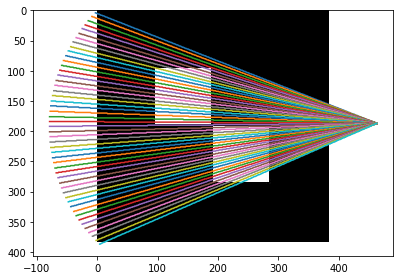

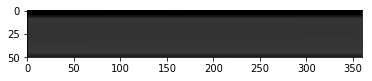

In [37]:
import numpy as np
#obraz a * a
# r = a * sqrt(2) / 2
# 1 emiter, n - detektorow
# screen (rozmiescic emiter i detektory i tam wgl)
# 
obraz = wczytajObraz("tomograf-zdjecia/Kwadraty2.jpg")
print('Obraz.shape = ',obraz.shape)
if(obraz.shape[0]!=obraz.shape[1]):
    roznica = obraz.shape[0] - obraz.shape[1]
    m = np.zeros((roznica,obraz.shape[0],3))
    print('m.shape=',m.shape)
    #print('m.t=',m.T)
    if(roznica > 0):
        np.concatenate((obraz,m.T),axis=1)
        print('nic')
        
        
print('nowy obraz.shape=',obraz.shape)
r = np.sqrt(obraz.shape[0]**2 + obraz.shape[1]**2)/2
alfa = 0 * np.pi / 180
print('r=',r)
liczbaDetektorow = 50
ileIteracji = 360
#stworz sinogram
sinogram = np.zeros([liczbaDetektorow,ileIteracji,3],dtype=np.int64)
sinogram.fill(0)
    
for k in range(ileIteracji):
    if(k % 10==0): print('iteracja: ',k,'/',ileIteracji)
    alfa = (alfa + k/360.0) * np.pi / 180
    emiter = np.array([r*np.cos(alfa),r*np.sin(alfa)])
    #print('emiter=',emiter)
    emiter[0] = emiter[0] + obraz.shape[0]/2
    emiter[1] = obraz.shape[1]/2-emiter[1]
    #print('emiter=',emiter)
    
    rozpietosc = 90 * np.pi / 180
    detektory = np.array([[0 for i in range(2)] for j in range(liczbaDetektorow)])

    detektory[0,0] = r * np.cos(alfa + np.pi-rozpietosc/2)
    detektory[0,1] = r * np.sin(alfa + np.pi-rozpietosc/2)
    detektory[0,0] = detektory[0,0] + obraz.shape[0]/2
    detektory[0,1] = obraz.shape[1]/2-detektory[0,1] 

    for i in range(1,liczbaDetektorow):
        detektory[i,0] = r * np.cos(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))
        detektory[i,1] = r * np.sin(alfa + np.pi-rozpietosc/2 + i*rozpietosc/(liczbaDetektorow-1))

        detektory[i,0] = detektory[i,0] + obraz.shape[0]/2
        detektory[i,1] = obraz.shape[1]/2-detektory[i,1]  
    #print(detektory)


    wszystkieLinieX = []
    wszystkieLinieY = []
    for i in range(liczbaDetektorow):
        liniaX,liniaY = bresenhamS(int(emiter[0]),int(emiter[1]),int(detektory[i,0]),int(detektory[i,1]))
        #for j in range(len(l))
        #print('liniaX=',liniaX)
        wszystkieLinieX.append(liniaX)
        wszystkieLinieY.append(liniaY)

    #print(wszystkieLinieX,wszystkieLinieY)

    srednia = []
    for i in range(len(wszystkieLinieX)):
        suma=np.array([0,0,0])
        liczbaElementowWsrodku=0
        for j in range(len(wszystkieLinieX[i])):
            if (wszystkieLinieX[i][j] < obraz.shape[0]) and (wszystkieLinieY[i][j] < obraz.shape[1]):
                suma += obraz[wszystkieLinieX[i][j],wszystkieLinieY[i][j]]
                liczbaElementowWsrodku += 1
        suma[0] /= liczbaElementowWsrodku
        suma[1] /= liczbaElementowWsrodku
        suma[2] /= liczbaElementowWsrodku
        srednia.append(suma)
    #print(srednia)


    
    for i in range(liczbaDetektorow):
        sinogram[i,k] += srednia[i]

for i in range(liczbaDetektorow):
    plt.plot(wszystkieLinieX[i],wszystkieLinieY[i])
#plt.plot(wszystkieLinieX[2],wszystkieLinieY[2])
#plt.plot(wszystkieLinieX[1],wszystkieLinieY[1])
#plt.plot(wszystkieLinieX[0],wszystkieLinieY[0])

plt.show()

plt.imshow(sinogram, interpolation='nearest')
plt.show()
#io.imshow(obraz)

In [3]:
a = np.array([[[0,0,0],[1,1,1]],[[0,0,0],[0,0,0]]])
print('shape=',a.shape)
print(a)
b = np.array([[0,0,0],[1,1,1]])
print('shape=',b.shape)
print(b)
print('wynik')
print(np.concatenate((a,b.T),axis=1))

shape= (2, 2, 3)
[[[0 0 0]
  [1 1 1]]

 [[0 0 0]
  [0 0 0]]]
shape= (2, 3)
[[0 0 0]
 [1 1 1]]
wynik


ValueError: all the input arrays must have same number of dimensions

In [62]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6]])
print('a.shape=',a.shape)
print('b.shape=',b.shape)
print(np.concatenate((a,b.T),axis=1))

a.shape= (2, 2)
b.shape= (1, 2)
[[1 2 5]
 [3 4 6]]


In [111]:
#wx,wy = bresenhamS(-400,0,0,400)
#for i in range(len(wx)):
#    print(wx[i],",",wy[i])
#print(wx,"\n",wy)
print(wszystkieLinieX[0][1])

-81
